# EDA - Exploratory Data Analysis

### Dataset : 

Ford Car Price Prediction Dataset : https://www.kaggle.com/datasets/adhurimquku/ford-car-price-prediction/data

### Data Cleaning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('ford.csv')
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


#### 1. Checking Column Types & Missing Values

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17812 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17812 non-null  object 
 1   year          17812 non-null  int64  
 2   price         17812 non-null  int64  
 3   transmission  17812 non-null  object 
 4   mileage       17812 non-null  int64  
 5   fuelType      17812 non-null  object 
 6   tax           17812 non-null  int64  
 7   mpg           17812 non-null  float64
 8   engineSize    17812 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.4+ MB


Dapat kita lihat pada saat pengecekan tipe coloum jumlah dari data pada setiap kolom nya bernilai sama yaitu 45000. Hal ini menandakan bahwa tidak terdapat missing value pada data yang kita gunakan

Sebagai Pengingat beberapa cara untuk mengatasi missing value :

1. Melakukan Konfirmasi kepada penyedia data
2. Drop the Column (Jika Missing value >50-60%)
3. Remove the Rows (Jika Missing value <50%)
4. Mengisi dengan Mean/Median dan Modus
    - mean, jika kolom tidak memiliki outlier
    - median, jika kita tidak bisa meyakinkan bahwa kolom tersebut tidak memiliki outlier

#### 2. Check Duplicates

In [13]:
df.duplicated().sum()

0

In [15]:
df[df.duplicated()]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize


In [11]:
df = df.drop_duplicates()

#### 3. Check Different Formats

In [19]:
for col in ['model', 'transmission','fuelType']:
    print(f"Unik dari {col}:", df[col].unique())

Unik dari model: [' Fiesta' ' Focus' ' Puma' ' Kuga' ' EcoSport' ' C-MAX' ' Mondeo' ' Ka+'
 ' Tourneo Custom' ' S-MAX' ' B-MAX' ' Edge' ' Tourneo Connect'
 ' Grand C-MAX' ' KA' ' Galaxy' ' Mustang' ' Grand Tourneo Connect'
 ' Fusion' ' Ranger' ' Streetka' ' Escort' ' Transit Tourneo' 'Focus']
Unik dari transmission: ['Automatic' 'Manual' 'Semi-Auto']
Unik dari fuelType: ['Petrol' 'Diesel' 'Hybrid' 'Electric' 'Other']


#### 4. Feature Engineering

Beberapa teknik dasar feature engineering di antaranya:

- Encoding
- Binning
- Normalization

#### - Encoding

##### a. Label Encoding

In [21]:
from sklearn import preprocessing
# Ambil kolom-kolom kategorikal
cate_cols = df.select_dtypes(include=['object']).columns
# Ambil fungsi LabelEncoder ke variabel 'le'
le = preprocessing.LabelEncoder()
# copy dataframe ke variabel baru
df_label_encode = df.copy()

# Encode label kategorikal menggunakan Label Encoder
for col in cate_cols:
    df_label_encode[col] = le.fit_transform(df_label_encode[col].astype(str))

df_label_encode

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5,2017,12000,0,15944,4,150,57.7,1.0
1,6,2018,14000,1,9083,4,150,57.7,1.0
2,6,2017,13000,1,12456,4,150,57.7,1.0
3,5,2019,17500,1,10460,4,145,40.3,1.5
4,5,2019,16500,0,1482,4,145,48.7,1.0
...,...,...,...,...,...,...,...,...,...
17961,0,2017,8999,1,16700,4,150,47.1,1.4
17962,0,2014,7499,1,40700,4,30,57.7,1.0
17963,6,2015,9999,1,7010,0,20,67.3,1.6
17964,11,2018,8299,1,5007,4,145,57.7,1.2


In [23]:
df_label_encode.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17812 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17812 non-null  int32  
 1   year          17812 non-null  int64  
 2   price         17812 non-null  int64  
 3   transmission  17812 non-null  int32  
 4   mileage       17812 non-null  int64  
 5   fuelType      17812 non-null  int32  
 6   tax           17812 non-null  int64  
 7   mpg           17812 non-null  float64
 8   engineSize    17812 non-null  float64
dtypes: float64(2), int32(3), int64(4)
memory usage: 1.2 MB


##### b. One-Hot Encoding

In [25]:
df_one_hot = pd.get_dummies(df, dtype=int)
df_one_hot

,year,price,mileage,tax,mpg,engineSize,model_ B-MAX,model_ C-MAX,model_ EcoSport,model_ Edge,...,model_ Transit Tourneo,model_Focus,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2017,12000,15944,150,57.7,1.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,2018,14000,9083,150,57.7,1.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,2017,13000,12456,150,57.7,1.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,2019,17500,10460,145,40.3,1.5,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,2019,16500,1482,145,48.7,1.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17961,2017,8999,16700,150,47.1,1.4,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
17962,2014,7499,40700,30,57.7,1.0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
17963,2015,9999,7010,20,67.3,1.6,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
17964,2018,8299,5007,145,57.7,1.2,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [27]:
df_one_hot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17812 entries, 0 to 17965
Data columns (total 38 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   year                          17812 non-null  int64  
 1   price                         17812 non-null  int64  
 2   mileage                       17812 non-null  int64  
 3   tax                           17812 non-null  int64  
 4   mpg                           17812 non-null  float64
 5   engineSize                    17812 non-null  float64
 6   model_ B-MAX                  17812 non-null  int32  
 7   model_ C-MAX                  17812 non-null  int32  
 8   model_ EcoSport               17812 non-null  int32  
 9   model_ Edge                   17812 non-null  int32  
 10  model_ Escort                 17812 non-null  int32  
 11  model_ Fiesta                 17812 non-null  int32  
 12  model_ Focus                  17812 non-null  int32  
 13  model_

### Visualisasi Data

#### Melihat Persebaran Data menggunakan Histogram

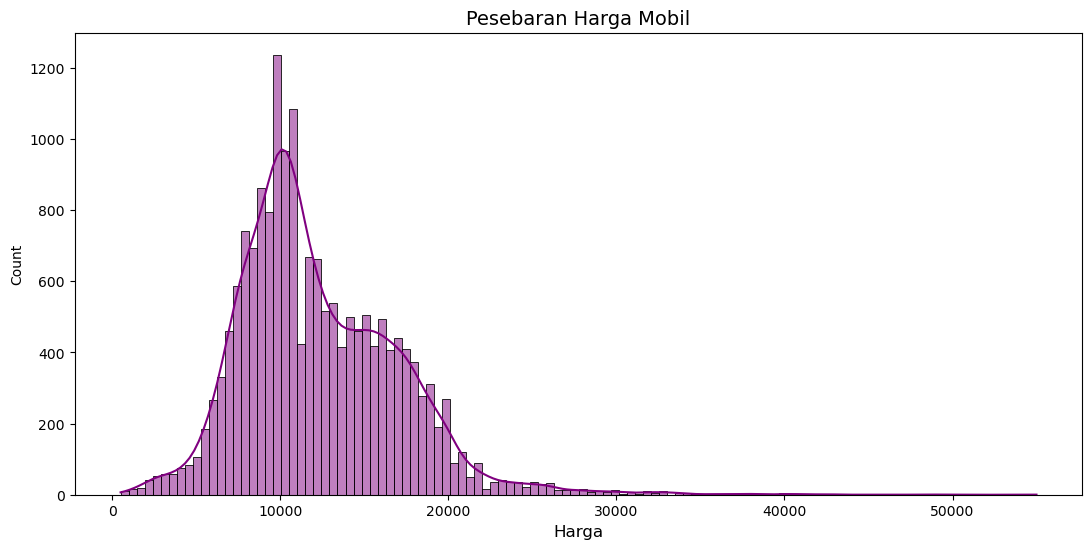

In [29]:
fig = plt.figure(figsize=(13, 6))
ax = sns.histplot(x=df['price'], kde=True, color='purple')
plt.title("Pesebaran Harga Mobil", fontsize=14)
plt.xlabel("Harga", fontsize=12)

plt.show()

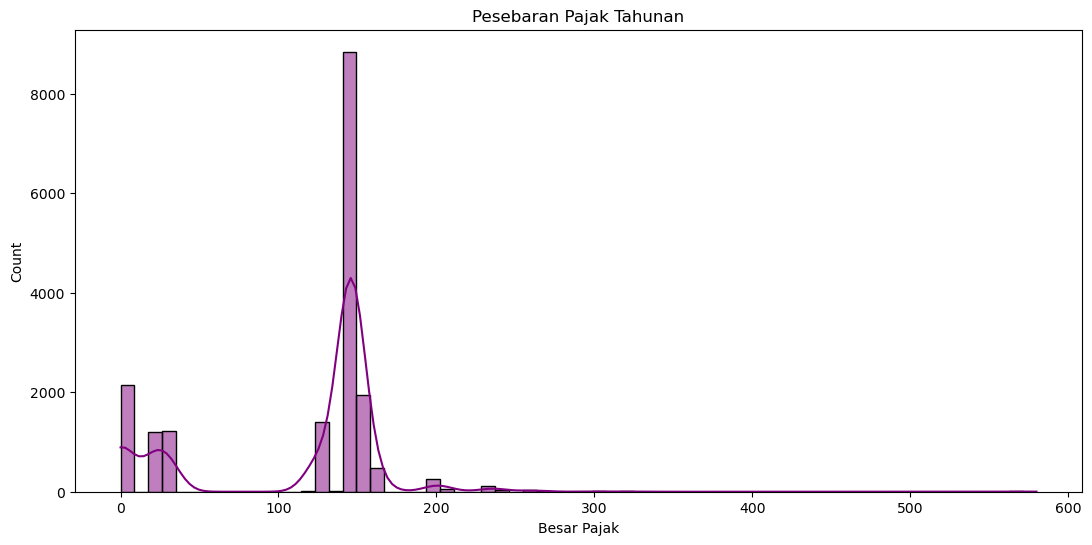

In [31]:
fig = plt.figure(figsize=(13, 6))
ax = sns.histplot(x=df['tax'], kde=True, color='purple')

plt.title("Pesebaran Pajak Tahunan")
plt.xlabel("Besar Pajak")
plt.show()

#### Melihat persebaran data dan pengecekan outlier menggunakan box plot

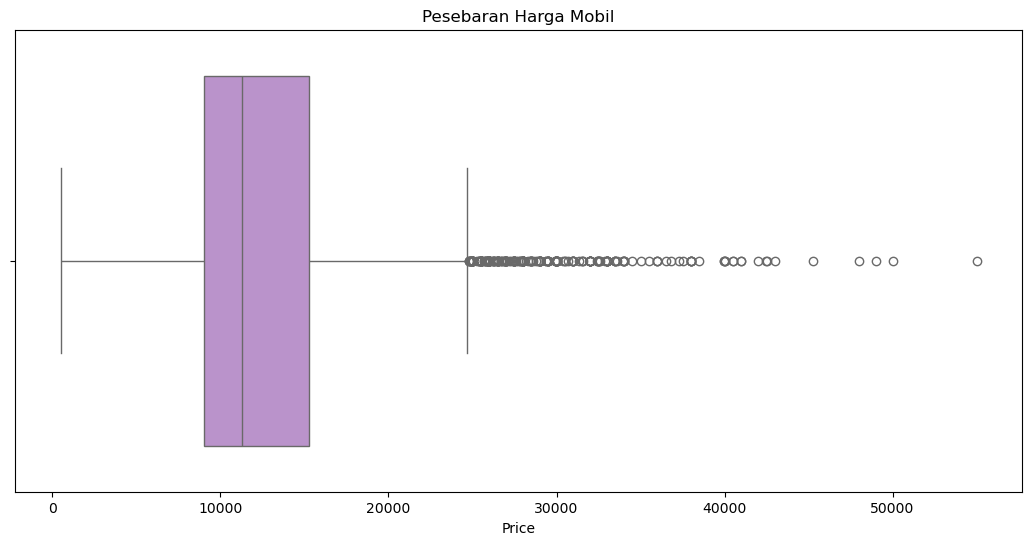

In [33]:
fig = plt.figure(figsize=(13, 6))
ax = sns.boxplot(x='price', data=df, color='#bd8ad4')

plt.title("Pesebaran Harga Mobil")
plt.xlabel("Price")

plt.show()

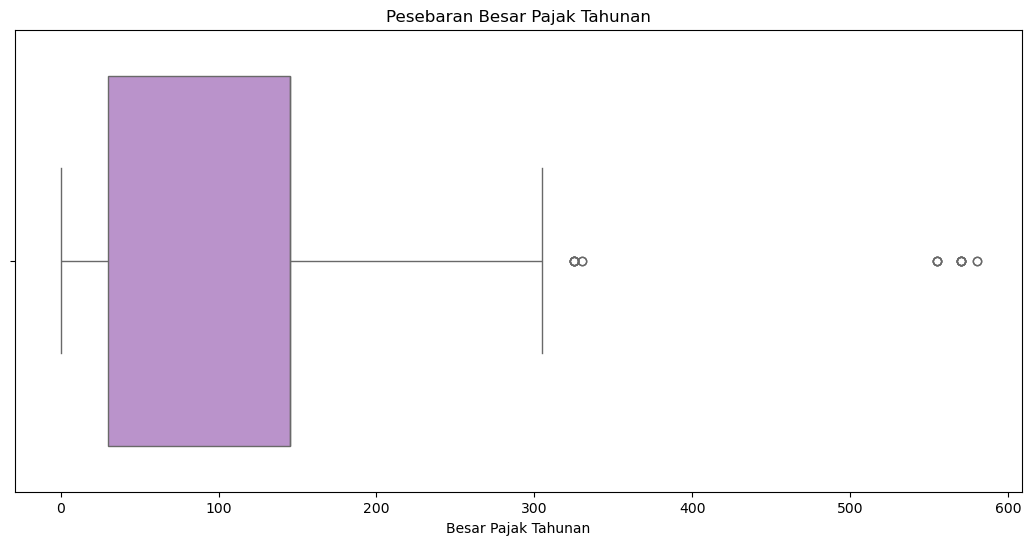

In [35]:
# melihat pesebaran data menggunakan boxplot
fig = plt.figure(figsize=(13, 6))
ax = sns.boxplot(x='tax', data=df, color='#bd8ad4')

plt.title("Pesebaran Besar Pajak Tahunan")
plt.xlabel("Besar Pajak Tahunan")

plt.show()

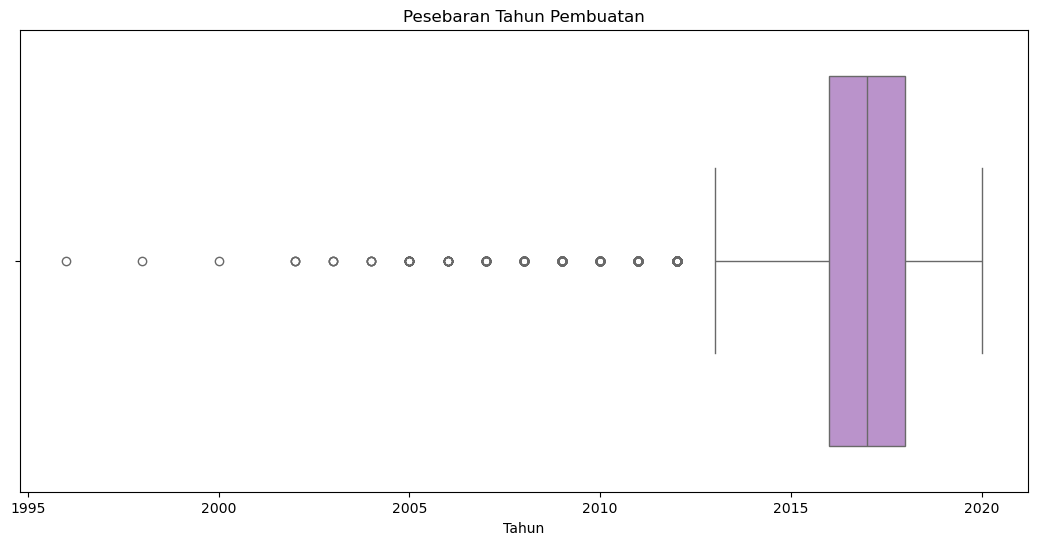

In [41]:
fig = plt.figure(figsize=(13, 6))
ax = sns.boxplot(x='year', data=df, color='#bd8ad4')

plt.title("Pesebaran Tahun Pembuatan")
plt.xlabel("Tahun")

plt.show()

In [39]:
df = df[df['year'] != 2060]

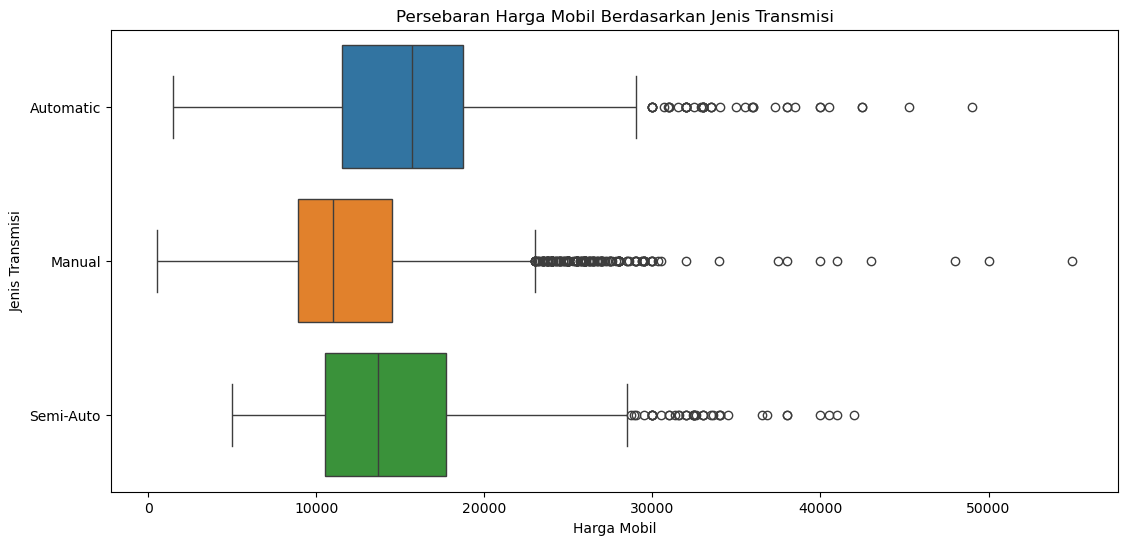

In [43]:
fig = plt.figure(figsize=(13, 6))
ax = sns.boxplot(y='transmission', x='price', data=df, hue='transmission')
plt.title("Persebaran Harga Mobil Berdasarkan Jenis Transmisi")
plt.xlabel("Harga Mobil")
plt.ylabel("Jenis Transmisi")

plt.show()

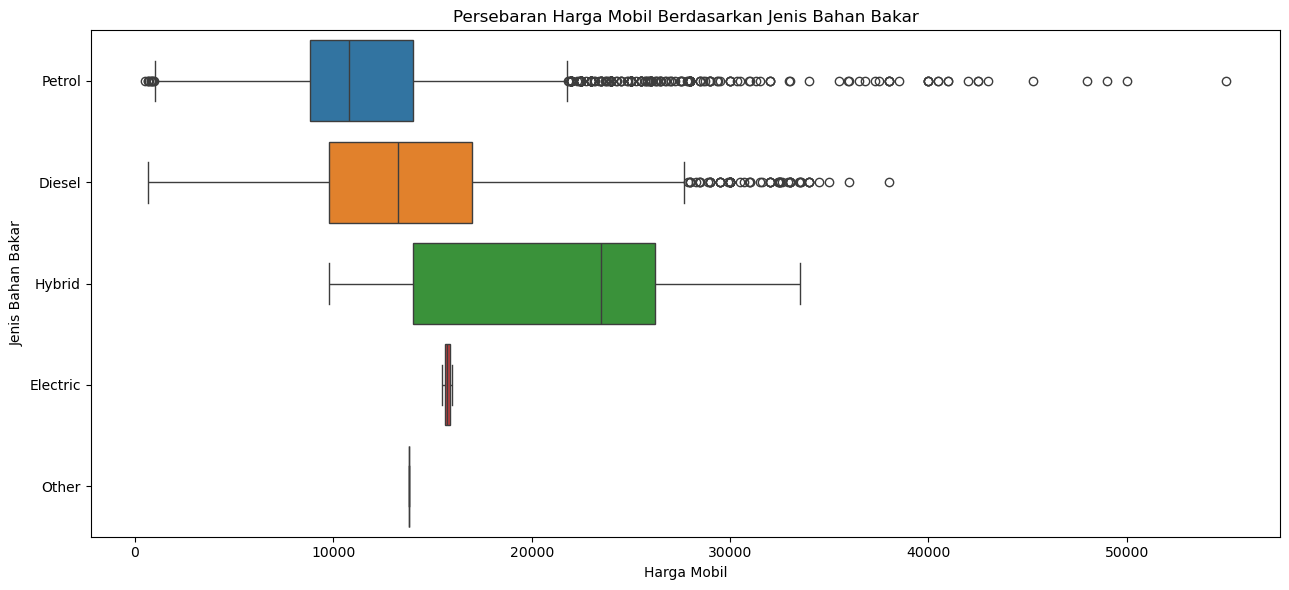

In [45]:
fig = plt.figure(figsize=(13, 6))
ax = sns.boxplot(y='fuelType', x='price', data=df, hue='fuelType')
plt.title("Persebaran Harga Mobil Berdasarkan Jenis Bahan Bakar")
plt.xlabel("Harga Mobil")
plt.ylabel("Jenis Bahan Bakar")
plt.tight_layout()
plt.show()


#### Melihat Distribusi Data menggunakan Contplot¶

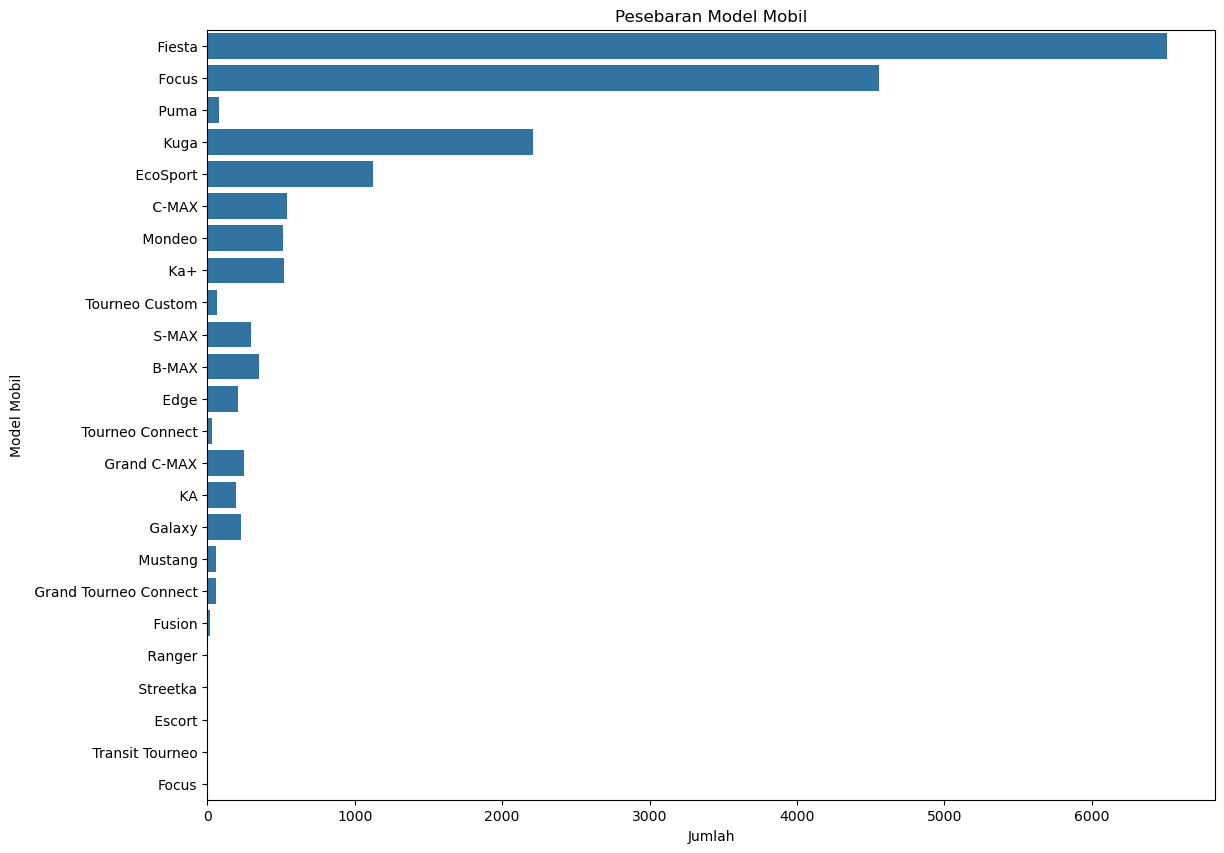

In [47]:
fig = plt.figure(figsize=(13, 10))
ax = sns.countplot(y=df['model'])

plt.title("Pesebaran Model Mobil")
plt.xlabel("Jumlah")
plt.ylabel("Model Mobil")
plt.show()

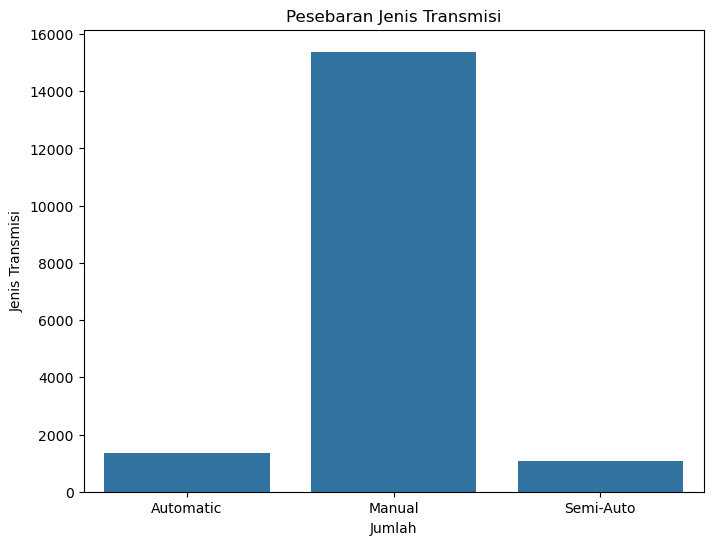

In [49]:
fig = plt.figure(figsize=(8, 6))
ax = sns.countplot(x=df['transmission'])

plt.title("Pesebaran Jenis Transmisi")
plt.xlabel("Jumlah")
plt.ylabel("Jenis Transmisi")
plt.show()

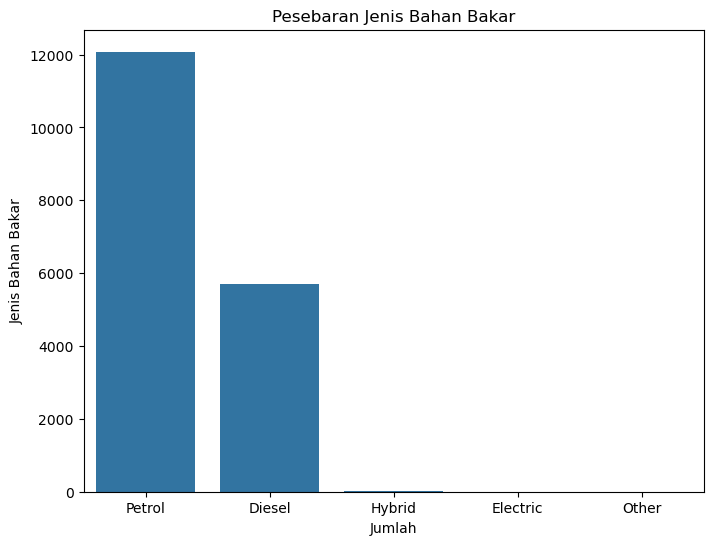

In [51]:
fig = plt.figure(figsize=(8, 6))
ax = sns.countplot(x=df['fuelType'])

plt.title("Pesebaran Jenis Bahan Bakar")
plt.xlabel("Jumlah")
plt.ylabel("Jenis Bahan Bakar")
plt.show()

#### Analisis Korelasi Antar Variabel Numerik

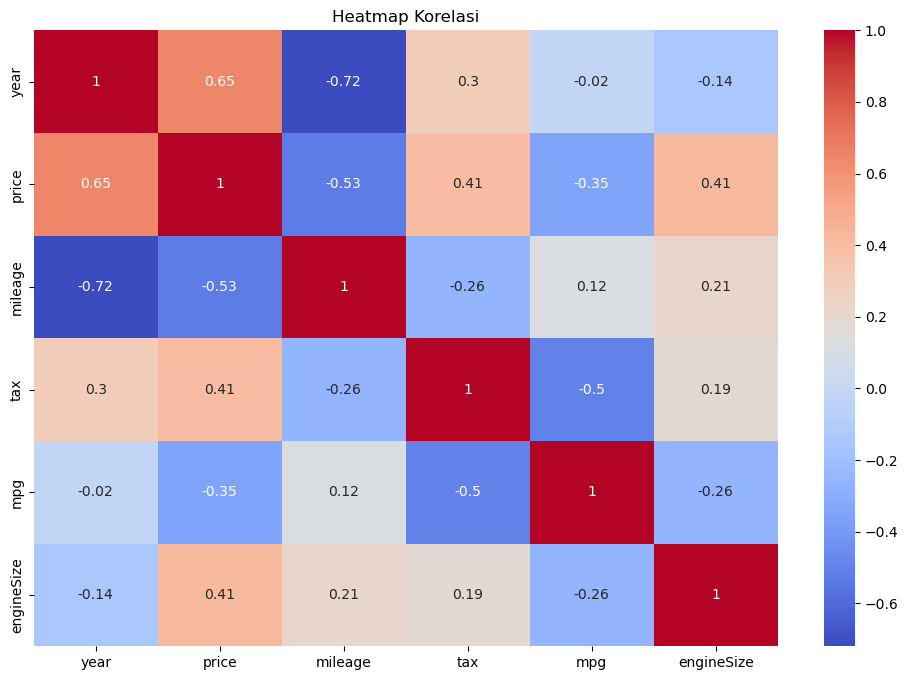

In [53]:
numeric_df = df.select_dtypes(include='number')

plt.figure(figsize=(12, 8)) 
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Heatmap Korelasi")
plt.show()

#### Melihat Hubungan Antara 2 Kolom Dengan Scatterplot

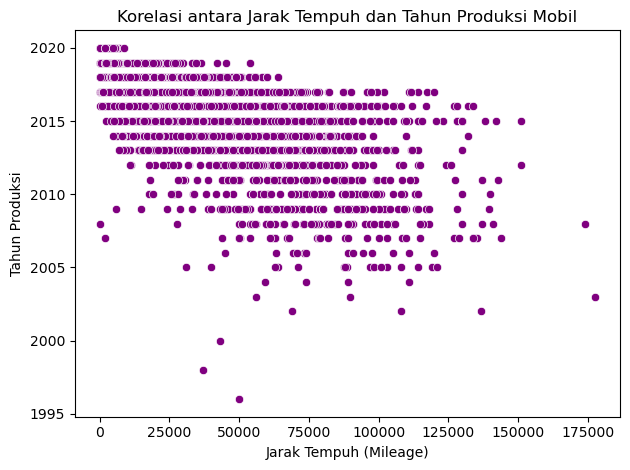

In [55]:
sns.scatterplot(x = df['mileage'], y = df["year"], data = df, color = 'purple')
plt.title("Korelasi antara Jarak Tempuh dan Tahun Produksi Mobil")
plt.xlabel("Jarak Tempuh (Mileage)")
plt.ylabel("Tahun Produksi")
plt.tight_layout()
plt.show()


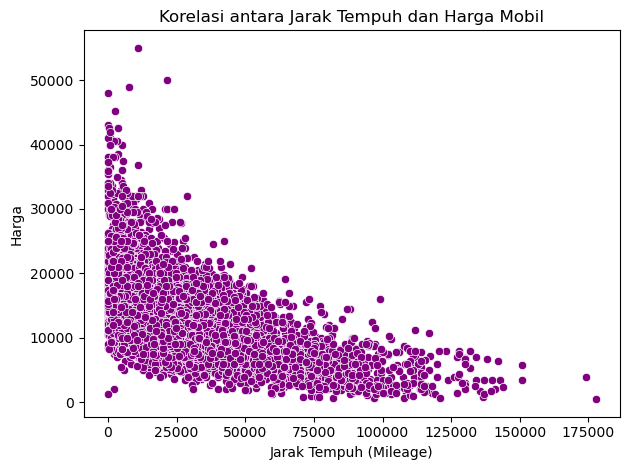

In [57]:
sns.scatterplot(x = df['mileage'], y = df["price"], data = df, color = 'purple')
plt.title("Korelasi antara Jarak Tempuh dan Harga Mobil")
plt.xlabel("Jarak Tempuh (Mileage)")
plt.ylabel("Harga")
plt.tight_layout()
plt.show()

In [59]:
df_label_encode.to_csv(r"C:\Users\Acer\Praktikum Data Science\Pertemuan 7\ford_clean.csv", index=False)